In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Super_Store_data.csv',encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [ ]:
print("SHAPE",df.shape)
class_dist = df['Region'].value_counts()
print("CLASS DISTRIBUTION:")
print(class_dist)

SHAPE (2121, 21)
CLASS DISTRIBUTION:
West       707
East       601
Central    481
South      332
Name: Region, dtype: int64


<Figure size 0x800 with 0 Axes>

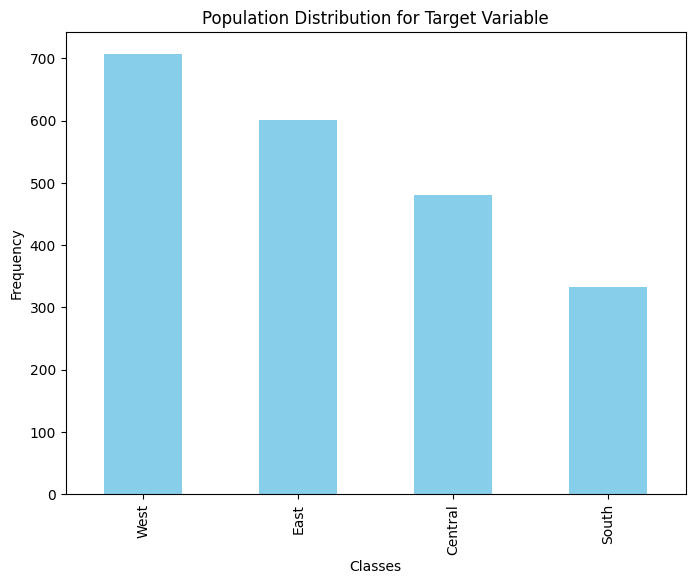

In [ ]:
plt.figure(figsize=(0,8))
plt.figure(figsize=(8, 6))
df['Region'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Population Distribution for Target Variable')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sample_size = 75
random_sample = df.sample(n=sample_size,random_state=42)
print(random_sample)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
1845    8665  CA-2017-126634   3/30/2017    4/1/2017    Second Class   
1486    7115  US-2016-102239    5/5/2016    5/6/2016     First Class   
289     1386  US-2016-108504    2/5/2016    2/5/2016        Same Day   
1607    7591  CA-2016-158778    9/5/2016    9/9/2016  Standard Class   
1857    8718  CA-2016-120824   6/12/2016   6/16/2016    Second Class   
...      ...             ...         ...         ...             ...   
1007    4825  CA-2016-140018  11/21/2016  11/26/2016  Standard Class   
298     1413  CA-2016-136329    7/9/2016   7/13/2016  Standard Class   
381     1842  CA-2016-157763   7/18/2016   7/23/2016  Standard Class   
741     3497  CA-2016-107328    8/8/2016   8/15/2016  Standard Class   
1078    5228  CA-2016-119865   6/21/2016   6/26/2016  Standard Class   

     Customer ID        Customer Name      Segment        Country  \
1845    AB-10165          Alan Barnes     Consumer  United States 

In [ ]:
grouped_data = df.groupby('Region')
print("STRATA GROUP: ",grouped_data.ngroups)
print("SIZE OF EACH STRATUM")
print(grouped_data.size())
for gn , gdf in grouped_data:
  print('STRATUM: ',gn)
  print(gdf.head())

STRATA GROUP:  4
SIZE OF EACH STRATUM
Region
Central    481
East       601
South      332
West       707
dtype: int64
STRATUM:  Central
    Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
9       37  CA-2016-117590   12/8/2016  12/10/2016     First Class   
10      39  CA-2015-117415  12/27/2015  12/31/2015  Standard Class   
11      40  CA-2015-117415  12/27/2015  12/31/2015  Standard Class   
12      52  CA-2015-115742   4/18/2015   4/22/2015  Standard Class   
13      53  CA-2015-115742   4/18/2015   4/22/2015  Standard Class   

   Customer ID  Customer Name      Segment        Country        City  ...  \
9     GH-14485      Gene Hale    Corporate  United States  Richardson  ...   
10    SN-20710   Steve Nguyen  Home Office  United States     Houston  ...   
11    SN-20710   Steve Nguyen  Home Office  United States     Houston  ...   
12    DP-13000  Darren Powers     Consumer  United States  New Albany  ...   
13    DP-13000  Darren Powers     Consumer  United St

In [ ]:
target_column = 'Region'
strata = df[target_column].unique()


sample_sizes = {'stratum_1': 50, 'stratum_2': 30, 'stratum_3': 20}


stratified_sample = pd.DataFrame()

for stratum_value, sample_size in sample_sizes.items():

    if sample_size > 0:

        stratum_data = df[df[target_column] == stratum_value]
        if len(stratum_data) >= sample_size:
            stratum_sample = stratum_data.sample(n=sample_size, replace=True, random_state=42)
            stratified_sample = pd.concat([stratified_sample, stratum_sample])
        else:
            print(f"Warning: Sample size for stratum '{stratum_value}' exceeds the available data. Using all available data.")
            stratified_sample = pd.concat([stratified_sample, stratum_data])
    else:
        print(f"Warning: Sample size for stratum '{stratum_value}' is zero or negative. Skipping this stratum.")


print("Disproportionate Stratified Sample:")
print(stratified_sample)

Disproportionate Stratified Sample:
Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd2 in position 17654: invalid continuation byte

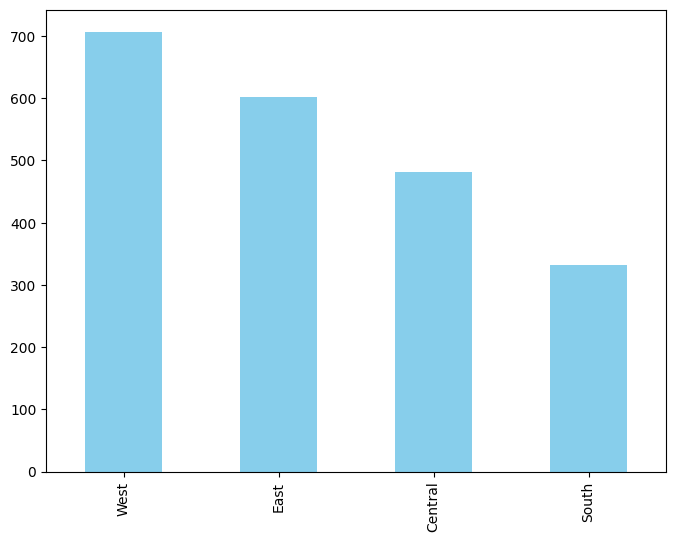

In [ ]:
plt.figure(figsize=(8, 6))
df['Region'].value_counts().plot(kind='bar', color='skyblue', label='Stratified Sample')
random_sample_file = 'random_sample.csv'
random_sample = pd.read_csv('/content/Super_Store_data.csv')
random_sample['Region'].value_counts().plot(kind='bar', color='orange', alpha=0.7, label='Random Sample')
plt.title('Distribution of Target Variable in Stratified vs. Random Sample')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
important_variables = ['Sales', 'Profit']
population_statistics = df[important_variables].describe()
stratified_sample_statistics = df[important_variables].describe()
print("Summary Statistics for Population:")
print(population_statistics)
print("\nSummary Statistics for Stratified Sample:")
print(stratified_sample_statistics)

Summary Statistics for Population:
             Sales       Profit
count  2121.000000  2121.000000
mean    349.834887     8.699327
std     503.179145   136.049246
min       1.892000 -1862.312400
25%      47.040000   -12.849000
50%     182.220000     7.774800
75%     435.168000    33.726600
max    4416.174000  1013.127000

Summary Statistics for Stratified Sample:
             Sales       Profit
count  2121.000000  2121.000000
mean    349.834887     8.699327
std     503.179145   136.049246
min       1.892000 -1862.312400
25%      47.040000   -12.849000
50%     182.220000     7.774800
75%     435.168000    33.726600
max    4416.174000  1013.127000
